<a href="https://colab.research.google.com/github/Maharaja2627/TIME-SERIES-ANALYSIS/blob/main/EXPT8/EXPT8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages (uncomment if running for the first time)
!pip install pandas numpy matplotlib statsmodels


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


In [6]:
# Load the CSV file
df = pd.read_csv("/content/sample_data/Car_sales.csv")

# Display first few rows
df.head()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


In [7]:
# Convert 'Latest_Launch' to datetime
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], errors='coerce')

# Drop rows with missing date or sales data
df = df.dropna(subset=['Latest_Launch', 'Sales_in_thousands'])

# Group by launch date and sum sales
ts = df.groupby('Latest_Launch')['Sales_in_thousands'].sum().sort_index()

# Show the first few values of the time series
ts.head()


,Sales_in_thousands
Latest_Launch,
2011-02-10,276.970
2011-03-07,95.719
2011-03-10,8.588
2011-04-01,44.150
2011-04-04,17.527


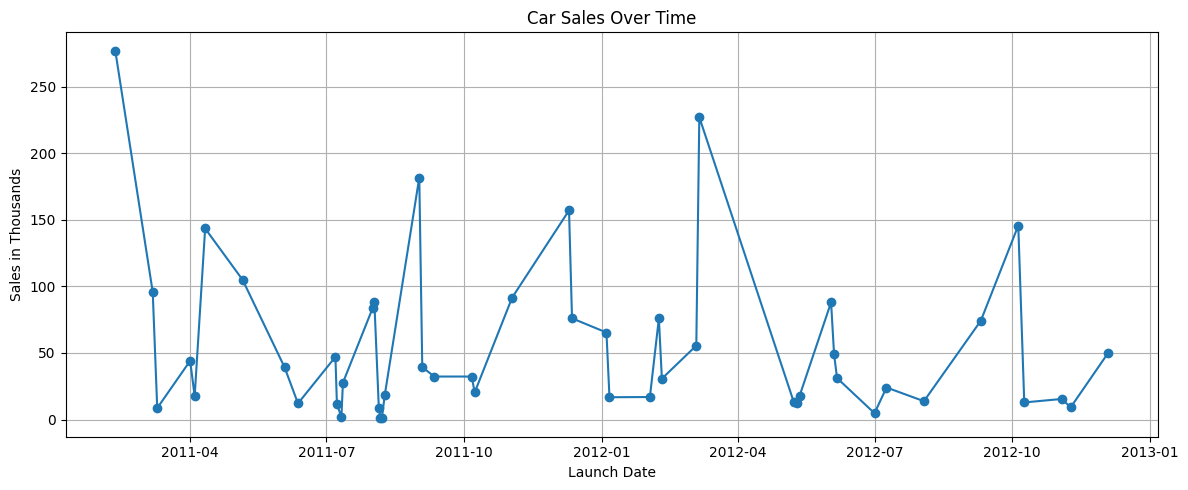

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(ts, marker='o')
plt.title('Car Sales Over Time')
plt.xlabel('Launch Date')
plt.ylabel('Sales in Thousands')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -5.374008815428063
p-value: 3.840033786812114e-06
Critical Values:
   1%: -3.584828853223594
   5%: -2.9282991495198907
   10%: -2.6023438271604937


In [10]:
# ARIMA(p, d, q) where:
# p = AR terms, d = differencing, q = MA terms
model = ARIMA(ts, order=(1, 0, 1))
model_fit = model.fit()

# Show model summary
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Sales_in_thousands   No. Observations:                   49
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -267.965
Date:                Thu, 17 Apr 2025   AIC                            543.930
Time:                        08:14:12   BIC                            551.498
Sample:                             0   HQIC                           546.801
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.6488      3.665     14.638      0.000      46.465      60.832
ar.L1          0.7494      0.227      3.300      0.001       0.304       1.195
ma.L1         -0.9998     41.475     -0.024      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


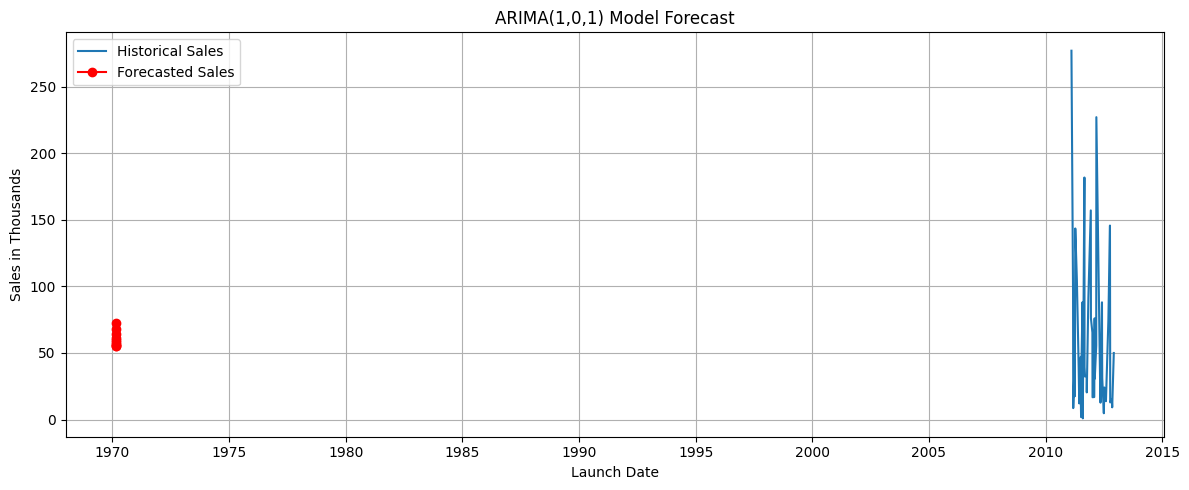

In [11]:
# Forecast next 10 time periods
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red', marker='o')
plt.title('ARIMA(1,0,1) Model Forecast')
plt.xlabel('Launch Date')
plt.ylabel('Sales in Thousands')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
print("Forecasted Sales (next 10 periods):")
print(forecast)


Forecasted Sales (next 10 periods):
49    72.485216
50    67.765227
51    64.227965
52    61.577066
53    59.590424
54    58.101593
55    56.985830
56    56.149654
57    55.523005
58    55.053381
Name: predicted_mean, dtype: float64
